### Źródło danych: 


Do projektu została wykorzystana baza danych pobrana ze strony Kaggle i jest dostępna pod adresem: https://www.kaggle.com/datasets/brijlaldhankour/car-buyers
<br>
Zbiór jest rejestrem 6092 rekordów dotyczących sprzedaży 501 modeli samochodów.
<br>
W naszej analizie wykorzystamy następujące kolumny z podanej bazy danych:
<ul>
    <li>Manufacturer - Producent</li>
    <li>Model - Model</li>
    <li>Price - Cena</li>
    <li>Power - Moc (w KM)</li>
    <li>Engine CC - Pojemność silnika w cm^3</li>
    <li>Fuel - Rodzaj paliwa</li>
    <li>Male - Ilość kupiona przez mężczyzn</li>
    <li>Female- Ilość kupiona przez kobiety</li>
    <li>Unknown - Ilość kupiona przez płeć nieznaną</li>
    <li>Total - Suma sprzedaży danego modelu</li>
</ul>

### Wczytanie i obróbka danych

Import Bibliotek

In [137]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Wczytanie danych

In [138]:
dataSet = pd.read_csv("CarBuyers.csv")

Usunięcie niepotrzebnej kolumny

In [139]:
dataSet.drop("Transmission", axis="columns", inplace= True)

Przejrzenie zawartości bazy danych

In [140]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Power         6092 non-null   float64
 4   Engine CC     6092 non-null   float64
 5   Fuel          6092 non-null   object 
 6   Male          6092 non-null   object 
 7   Female        6092 non-null   object 
 8   Unknown       6092 non-null   object 
 9   Total         6092 non-null   object 
dtypes: float64(3), object(7)
memory usage: 476.1+ KB


In [141]:
dataSet.head()

,Manufacturer,Model,Price,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


Zmienne typu <i>object</i> takie jak <i>Male, Female, Unknow, Total</i> zawierają w sobie przecinki, więc aby w dalszej części była możliwa analiza ich jako liczb, należy usunąć przecinki i zmienić ich typ na <i>int</i>

In [142]:
columnsToChange = ["Male", "Female", "Unknown", "Total"]
for i in range(len(dataSet)):
    for column in columnsToChange:
        stringWithoutComma = str(dataSet.loc[i, column]).replace(",","")
        dataSet.loc[i, column] = stringWithoutComma

dataSet = dataSet.astype({"Fuel": "str", "Male": "int", "Female": "int", "Unknown": "int", "Total": "int"})
dataSet.info() #sprawdzamy czy typy zmieniono na int


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Power         6092 non-null   float64
 4   Engine CC     6092 non-null   float64
 5   Fuel          6092 non-null   object 
 6   Male          6092 non-null   int32  
 7   Female        6092 non-null   int32  
 8   Unknown       6092 non-null   int32  
 9   Total         6092 non-null   int32  
dtypes: float64(3), int32(4), object(3)
memory usage: 380.9+ KB


Baza posiada rozbite rekordy sprzedaży, więc sumujemy wszystkie sprzedaże do jednego rekordu.

In [143]:
dataSetUnique = pd.DataFrame()
for column in dataSet.columns:
    dataSetUnique[column]=[]
#dataSetUnique.loc[0] = dataSet.loc[0]
listOfModels = []

indexForNewRow = 0

for i in range(0, len(dataSet)):
    row = dataSet.loc[i]
    model = row["Model"]
    if model in listOfModels:
        index = listOfModels.index(row["Model"])
        dataSetUnique.loc[index, "Male"] += row["Male"]
        
    else:
        listOfModels.append(row["Model"])
        dataSetUnique.loc[indexForNewRow]=row
        indexForNewRow += 1

dataSet = dataSetUnique
dataSet



,Manufacturer,Model,Price,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,94.033898,1497.169492,petrol,7221769,422731,56487,1293390
1,Ford,Fiesta,18.532143,68.571429,1166.142857,petrol,12150919,631666,54057,1240602
2,Volkswagen,Golf,31.242154,89.461538,1537.406593,petrol,7339526,310604,47563,841383
3,Renault,Clio,22.1,75.576923,1219.653846,petrol,3929068,312556,28004,581847
4,BMW,320i,47.84837,126.111111,1995.777778,petrol,6213366,115843,29125,552984
...,...,...,...,...,...,...,...,...,...,...
496,Honda,Quintet,4.968,59.0,1602.0,petrol,3050,331,44,1099
497,Renault,14,9.18075,46.75,1324.5,petrol,2120,423,37,1229
498,Renault,20,9.9475,73.5,1908.0,petrol,2400,196,30,1151
499,Lada,1200,4.536,44.0,1198.0,petrol,1295,361,26,1682


### Analiza bazy danych

#### Rankingi

Ranking samochodów względem mocy silnika

In [155]:
ranking = dataSet.sort_values("Power", ascending=False).head().drop(["Male", "Female", "Unknown", "Total"], axis="columns")
ranking
#PONIZSZY KOD DO POPRAWEK



,Manufacturer,Model,Price,Power,Engine CC,Fuel
383,Porsche,Carrera,646.605,450.0,5733.0,petrol
370,Audi,RS6,175.835,433.5,4493.5,petrol
219,Bentley,Continental,285.247,428.2,5577.8,petrol
176,Mercedes,SLS,264.675,420.0,6208.0,petrol
386,Nissan,GT-R,177.5,419.0,3799.0,petrol


Ranking smaochodów względem pojemności silnika

In [156]:
ranking = dataSet.sort_values("Engine CC", ascending=False).head().drop(["Male", "Female", "Unknown", "Total"], axis="columns")
ranking

,Manufacturer,Model,Price,Power,Engine CC,Fuel
176,Mercedes,SLS,264.675,420.0,6208.0,petrol
480,Daimler,Double,106.82,234.0,5993.0,petrol
288,Aston-Martin,DB9,273.755,381.0,5935.0,petrol
383,Porsche,Carrera,646.605,450.0,5733.0,petrol
219,Bentley,Continental,285.247,428.2,5577.8,petrol


Najdroższe modele

In [162]:
ranking = dataSet.sort_values("Price", ascending=False).head().drop(["Fuel", "Unknown", "Total"], axis="columns")
ranking

,Manufacturer,Model,Price,Power,Engine CC,Male,Female
383,Porsche,Carrera,646.605,450.0,5733.0,25353,83
272,Aston-Martin,Vantage,360.755,410.0,5341.0,25375,359
219,Bentley,Continental,285.247,428.2,5577.8,52397,1024
288,Aston-Martin,DB9,273.755,381.0,5935.0,24625,305
176,Mercedes,SLS,264.675,420.0,6208.0,143077,3121


#### Wykresy

Wykres ilości modeli danej marki

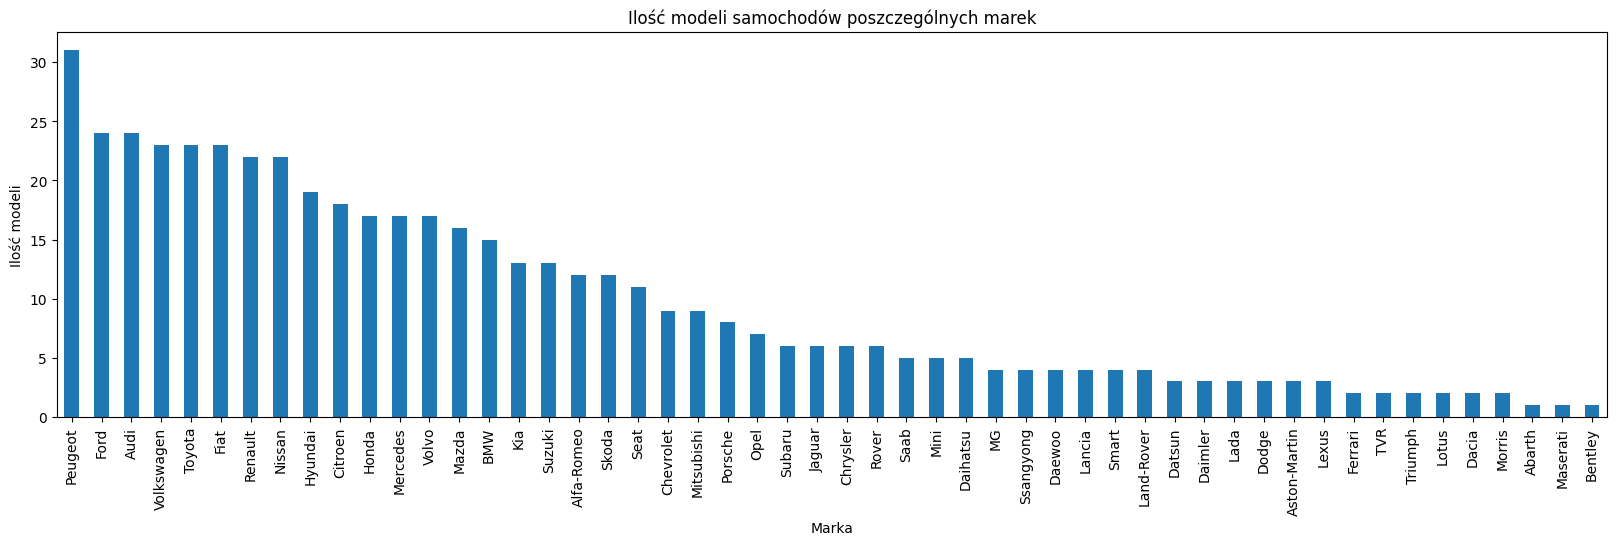

In [175]:
listOfUniqueBrands = dataSet["Manufacturer"].unique().tolist()
listOfBrands = dataSet["Manufacturer"].tolist()
chart = dataSet["Manufacturer"].value_counts()

chart.plot.bar(title="Ilość modeli samochodów poszczególnych marek", figsize=(20,5), xlabel="Marka", ylabel="Ilość modeli")

# fig, axes = plt.subplots(figsize=(20,5))
# g = sb.countplot(x="Manufacturer", data=dataSet)
# g.set_title("Ilość zakupionych aut danej marki")
# g.set_xlabel("Marka")
# g.set_ylabel("Ilość samochodów")

# fig, axes = plt.subplots(figsize=(10,5))
# g = sns.countplot(x='Children', data=df, palette='Paired')
# g.set_title('Ilość osób z x dziećmi')
# g.set_xlabel('Ilość Dzieci')
# g.set_ylabel('Ilość obserwacji')

plt.show()


Wykres sprzedaży dla każdej płci (liczbowo i procentowo)

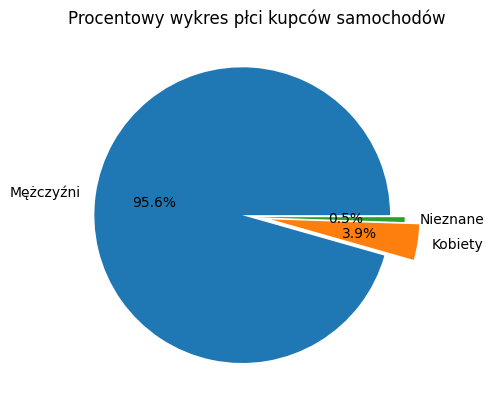

In [168]:
sums = [dataSet["Male"].sum(), dataSet["Female"].sum(), dataSet["Unknown"].sum()]
labels = ["Mężczyźni", "Kobiety", "Nieznane"]

plt.title("Procentowy wykres płci kupców samochodów")
plt.pie(sums, labels=labels, autopct='%1.1f%%', explode=(0.1, 0.1, 0))
plt.show()

Marki najczęściej wybierane przez mężczyzn (top 5 np)

Marki najczęściej wybierane przez kobiety

Najczęściej sprzedawane modele

Procentowe przedstawienie rodzaju paliwa wykorzystywanego przez dany model